In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [12]:
df = pd.read_json(
    'https://services.swpc.noaa.gov/json/goes/primary/integral-protons-7-day.json'
)
sat = df['satellite'].unique()
if len(sat) == 1:
    sat = sat[0]
    print(f"GOES satellite: {sat}")
else:
    print(f"Multiple satellites found: {sat}")
    sat = sat[0]
df = df.pivot(
    index='time_tag',
    columns='energy',
    values='flux'
)
df.index = pd.to_datetime(df.index, format='%Y-%m-%dT%H:%M:%SZ')

GOES satellite: 18


In [13]:
df['>=10 MeV']

time_tag
2025-11-07 04:15:00    0.204752
2025-11-07 04:20:00    0.185267
2025-11-07 04:25:00    0.182366
2025-11-07 04:30:00    0.163163
2025-11-07 04:35:00    0.181319
                         ...   
2025-11-14 03:45:00    4.039442
2025-11-14 03:50:00    4.064393
2025-11-14 03:55:00    3.961522
2025-11-14 04:00:00    3.397763
2025-11-14 04:05:00    3.719097
Name: >=10 MeV, Length: 2014, dtype: float64

Text(1.1, 200.0, 'Solar Radiation Storm Scale')

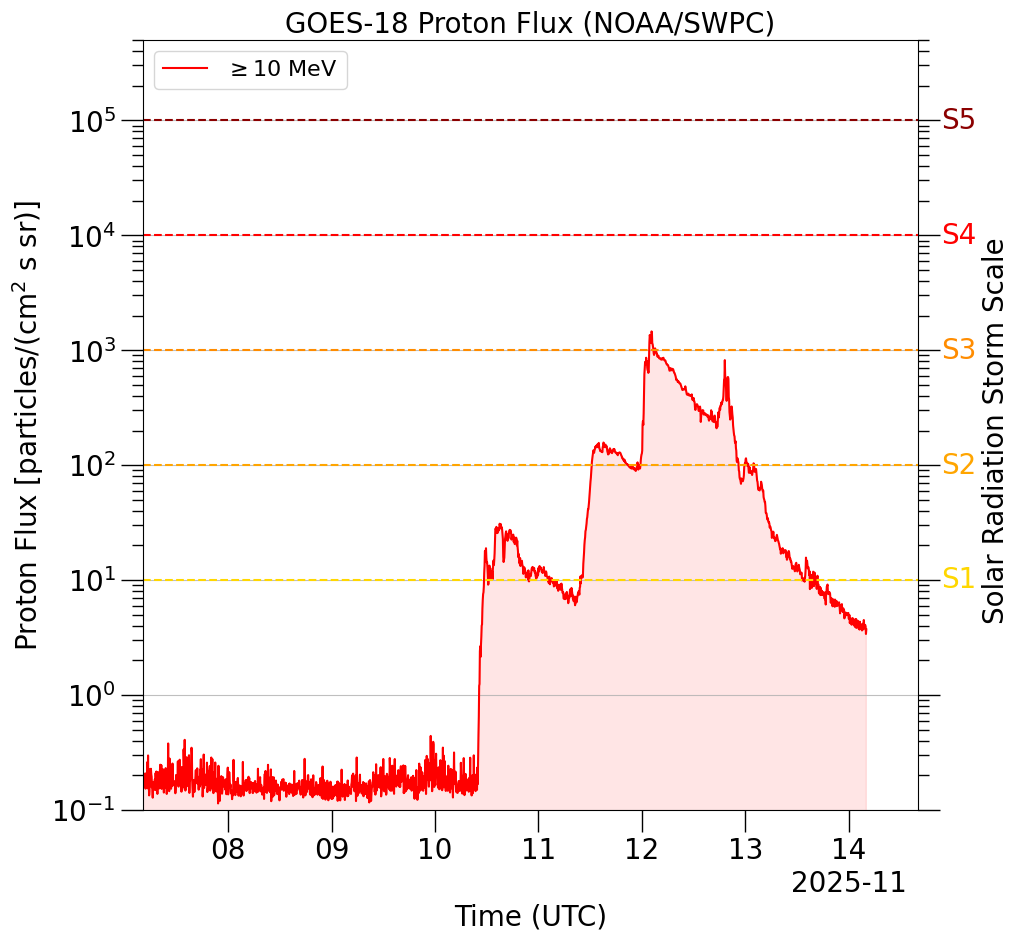

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(
    df.index, 
    df['>=10 MeV'],
    label=r'$\geq 10 \text{ MeV}$',
    color='red',
)
ax.legend(fontsize=16, loc='upper left')
ax.fill_between(
    df.index,
    df['>=10 MeV'],
    color='red',
    alpha=0.1,
)
ax.set_ylabel('Proton Flux [particles/(cm$^2$ s sr)]', fontsize=20)
ax.set_xlabel('Time (UTC)', fontsize=20)
ax.set_title(f'GOES-{sat} Proton Flux (NOAA/SWPC)', fontsize=20)
ax.set_yscale('log')
ax.set_ylim(1e-1, 5e5)
ax.set_yticks(np.logspace(-1, 5, 7))
ax.tick_params(axis='both', which='major', labelsize=20, length=16, width=1)
ax.tick_params(axis='both', which='minor', labelsize=20, length=8, width=1)
ax.tick_params(axis='y', which='both', right=True)

def custom_formatter(x, pos):
    ticks = ax.get_xticks()
    if len(ticks) == 0:
        return ""
    
    # Last tick (end of day)
    if abs(x - ticks[-1]) < 1e-6:
        dt = mdates.num2date(x)
        ym = dt.strftime("%Y-%m")
        d = dt.strftime("%d")
        return f"{d}\n{ym}"
    
    # Other ticks (day of month)
    dt = mdates.num2date(x)
    return dt.strftime("%d")

ax.xaxis.set_major_formatter(custom_formatter)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.set_xlim(df.index.min(), df.index.max()+pd.Timedelta(days=0.5))

ax.grid(True, which='major', axis='y', linestyle='-', alpha=0.8)

ax.axhline(1e1, color='gold', linestyle='--', zorder=2)
ax.text(1.03, 1e1, 'S1', color='gold', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.axhline(1e2, color='orange', linestyle='--', zorder=2)
ax.text(1.03, 1e2, 'S2', color='orange', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.axhline(1e3, color='darkorange', linestyle='--', zorder=2)
ax.text(1.03, 1e3, 'S3', color='darkorange', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.axhline(1e4, color='red', linestyle='--', zorder=2)
ax.text(1.03, 1e4, 'S4', color='red', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.axhline(1e5, color='darkred', linestyle='--', zorder=2)
ax.text(1.03, 1e5, 'S5', color='darkred', fontsize=20, 
        va='center', transform=ax.get_yaxis_transform())
ax.text(1.1, 2e2, 'Solar Radiation Storm Scale', rotation=90, fontsize=20, 
        va='center', ha='center', transform=ax.get_yaxis_transform())